In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
cancer_data=pd.read_csv("C:/Users/vishwateja/Desktop/haberman data/haberman.csv")
print(cancer_data.info())
print(cancer_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None
   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [111]:
# we notice that last colum survival_status_after_5_years is in interger type so we need to change it in categorical data that is,1 for yes and 0 for no
cancer_data["survival_status_after_5_years"]=cancer_data["survival_status_after_5_years"].map({1:"yes",2:"No"})
cancer_data["survival_status_after_5_years"]=cancer_data["survival_status_after_5_years"].astype("category")
print(cancer_data.info())
print(cancer_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None
   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           yes
1   30                 62                     3                           yes
2   30                 65                     0                           yes
3   31                 59                     2                           yes
4   31                 65                     4                           yes


In [112]:
print(cancer_data.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [113]:
#Numerical indexing
#.loc vs iloc
df=pd.DataFrame([1,2,3,4,5,6,7,8,9],index=[41,42,43,44,45,46,47,48,49])
print(df)
loc=df.loc[48]
iloc=df.iloc[7]
print(loc)
print(iloc)

    0
41  1
42  2
43  3
44  4
45  5
46  6
47  7
48  8
49  9
0    8
Name: 48, dtype: int64
0    8
Name: 48, dtype: int64


In [114]:
#value_counts()
cancer_data.iloc[:,-1].value_counts()

yes    225
No      81
Name: survival_status_after_5_years, dtype: int64

In [115]:
#percentage
cancer_data.iloc[:,-1].value_counts(normalize=True)

yes    0.735294
No     0.264706
Name: survival_status_after_5_years, dtype: float64

0 age


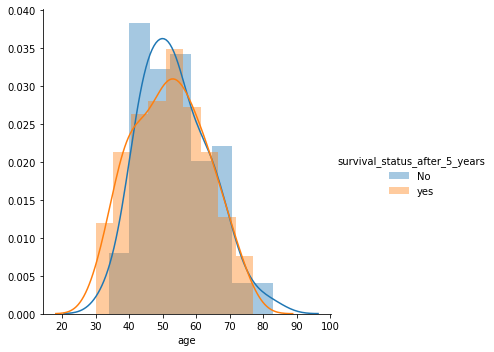

1 year_of_treatment


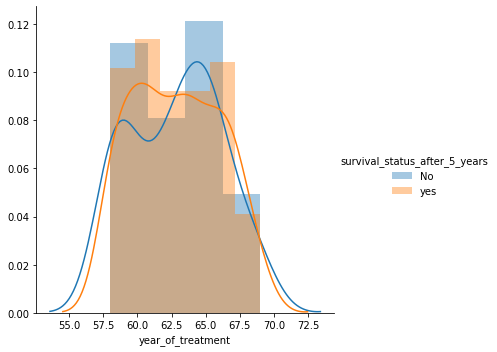

2 positive_lymph_nodes


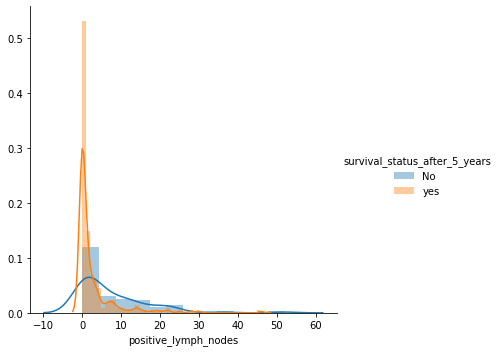

In [116]:
#Univariate analysis
for idx,feature in enumerate(list(cancer_data.columns)[:-1]):
    print(idx,feature)
    sns.FacetGrid(cancer_data,hue="survival_status_after_5_years",size=5)\
    .map(sns.distplot,feature).add_legend()
    plt.show()

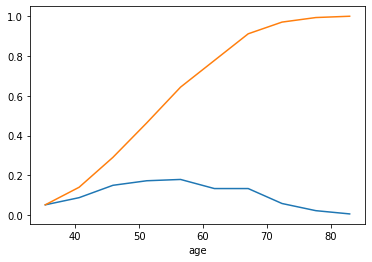

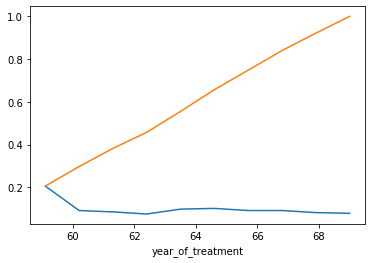

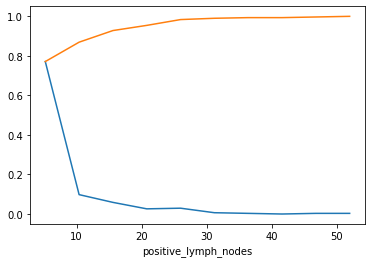

In [117]:
#probability distribution function and cyummukative distributive function
for idx,feature in enumerate(list(cancer_data.columns)[:-1]):
    count,bin_edges=np.histogram(cancer_data[feature])
    #print(count,bin_edges)
    pdf=count/sum(count)
    cdf=np.cumsum(pdf)
    #print(pdf,cdf)
    plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
    plt.xlabel(feature)
    plt.show()


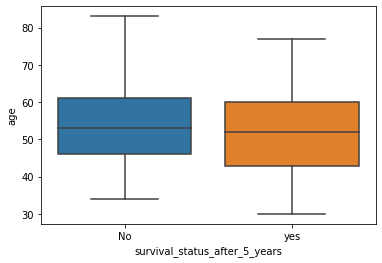

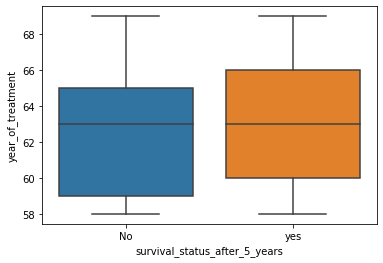

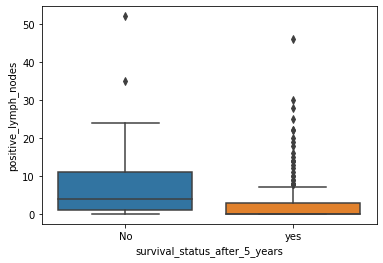

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [122]:
for idx,feature in enumerate(list(cancer_data.columns)[:]):
    sns.boxplot(x="survival_status_after_5_years",y=feature,data=cancer_data)
    plt.show()
    